# GRF - examples 1D

Generate gaussian random fields (GRF) using fast Fourier transform (FFT).

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
from geone import grf
import geone.covModel as gcm

## Define a covariance model

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

In [2]:
cov_model = gcm.CovModel1D(elem=[
    ('gaussian', {'w':5., 'r':100}), # elementary contribution
    ('nugget', {'w':1.})             # elementary contribution
    ], name='model-1D example')

## Functions of the covariance model and the variogram model
Get the functions.

In [3]:
cov_fun = cov_model.func()
vario_fun = cov_model.vario_func()

Get the sill and the range.

In [4]:
w = cov_model.sill()
r = cov_model.r()

Plot the functions.

Text(0.5,1,'model-1D example')

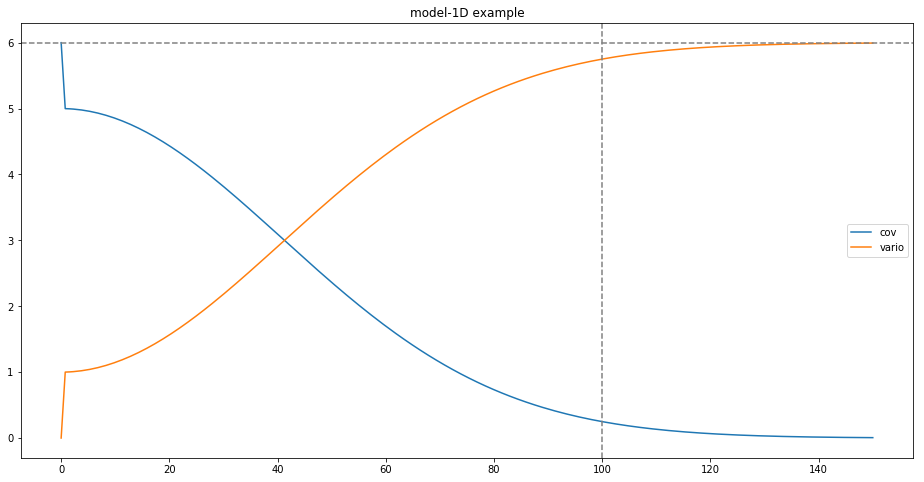

In [5]:
h = np.linspace(0, 1.5*r, 200)
ch = cov_fun(h)
vh = vario_fun(h)

plt.figure(figsize=(16,8))
plt.plot(h, ch, label='cov')
plt.plot(h, vh, label='vario')
plt.axhline(w, c='gray', ls='dashed')
plt.axvline(r, c='gray', ls='dashed')
plt.legend()
plt.title(cov_model.name)

## Simulation of GRF's - 1D
Define the simulation grid.

In [6]:
nx = 1000 # number of cells
dx = 0.5  # cell unit
ox = 0.0  # origin

As the generation of GRF's is based on FFT, periodic fields are generated. Hence, an extended simulation grid is used and then cropped after the simulation. The extension should be large enough in order to avoid wrong correlations, i.e. correlations across opposite borders of the grid, or correlations between two nodes regarding both distances between them (with respect to the periodic grid). This extension can be computed with the function `grf.extension_min`.

In [7]:
extensionMin = grf.extension_min(r, nx, dx)

### Unconditional simulations
Set the number of realizations, the seed and launch the (unconditional) simulations.

In [8]:
nreal = 2000
np.random.seed(123)
sim1Da = grf.grf1D(cov_fun, nx, dx, ox, 
                   extensionMin=extensionMin, nreal=nreal)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Unconditional simulation    1-   2 of 2000...
GRF1D: Unconditional simulation    3-   4 of 2000...
GRF1D: Unconditional simulation    5-   6 of 2000...
GRF1D: Unconditional simulation    7-   8 of 2000...
GRF1D: Unconditional simulation    9-  10 of 2000...
GRF1D: Unconditional simulation   11-  12 of 2000...
GRF1D: Unconditional simulation   13-  14 of 2000...
GRF1D: Unconditional simulation   15-  16 of 2000...
GRF1D: Unconditional simulation   17-  18 of 2000...
GRF1D: Unconditional simulation   19-  20 of 2000...
GRF1D: Unconditional simulation   21-  22 of 2000...
GRF1D: Unconditional simulation   23-  24 of 2000...
GRF1D: Unconditional simulation   25-  26 of 2000...
GRF1D: Unconditional simulation   27-  28 of 2000...
GRF1D: Unconditional simulation   29-  30 of 2000...
GRF1D: Unconditional simulation   31-  32 of 2000...
G

GRF1D: Unconditional simulation 1299-1300 of 2000...
GRF1D: Unconditional simulation 1301-1302 of 2000...
GRF1D: Unconditional simulation 1303-1304 of 2000...
GRF1D: Unconditional simulation 1305-1306 of 2000...
GRF1D: Unconditional simulation 1307-1308 of 2000...
GRF1D: Unconditional simulation 1309-1310 of 2000...
GRF1D: Unconditional simulation 1311-1312 of 2000...
GRF1D: Unconditional simulation 1313-1314 of 2000...
GRF1D: Unconditional simulation 1315-1316 of 2000...
GRF1D: Unconditional simulation 1317-1318 of 2000...
GRF1D: Unconditional simulation 1319-1320 of 2000...
GRF1D: Unconditional simulation 1321-1322 of 2000...
GRF1D: Unconditional simulation 1323-1324 of 2000...
GRF1D: Unconditional simulation 1325-1326 of 2000...
GRF1D: Unconditional simulation 1327-1328 of 2000...
GRF1D: Unconditional simulation 1329-1330 of 2000...
GRF1D: Unconditional simulation 1331-1332 of 2000...
GRF1D: Unconditional simulation 1333-1334 of 2000...
GRF1D: Unconditional simulation 1335-1336 of 2

The result is a 2d array of size `nreal` by `nx`:

In [9]:
sim1Da.shape

(2000, 1000)

Get the mean and the standard deviation.

In [10]:
sim1Da_mean = np.mean(sim1Da, axis=0)
sim1Da_std = np.std(sim1Da, axis=0)

Plot the first realizations, the mean, and the mean +/- standard deviation.

Text(0.5,1,'GRF with covariance model: model-1D example')

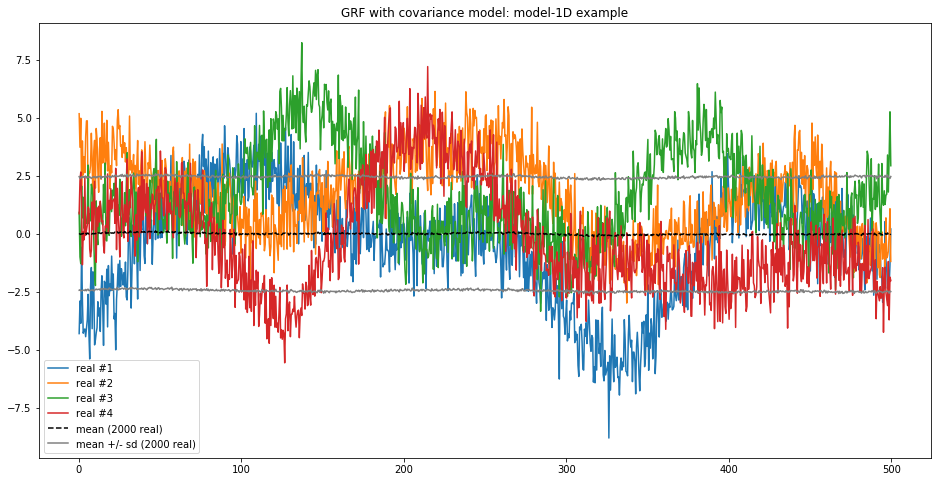

In [11]:
xg = ox + 0.5*dx + dx*np.arange(nx) # center of grid cells

plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Da[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Da_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.plot(xg, sim1Da_mean + sim1Da_std, c='gray', label='mean +/- sd ({} real)'.format(nreal))
plt.plot(xg, sim1Da_mean - sim1Da_std, c='gray')
plt.legend()
plt.title('GRF with covariance model: {}'.format(cov_model.name))

### Conditional simulations
Define hard data. Note that the conditioning values will be attached to the grid cells containing the corresponding conditioning locations.

In [12]:
x = [10.1, 50.7, 238.5, 384.3] # locations
v = [-3.2,  1.2,   4.7,  -2.0] # values

Launch the simulations and plot.

In [13]:
np.random.seed(123)
sim1Db = grf.grf1D(cov_fun, nx, dx, ox, x=x, v=v, 
                   extensionMin=extensionMin, nreal=nreal)
sim1Db_mean = np.mean(sim1Db, axis=0)
sim1Db_std = np.std(sim1Db, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 2000...
GRF1D: Unconditional simulation    3-   4 of 2000...
GRF1D: Unconditional simulation    5-   6 of 2000...
GRF1D: Unconditional simulation    7-   8 of 2000...
GRF1D: Unconditional simulation    9-  10 of 2000...
GRF1D: Unconditional simulation   11-  12 of 2000...
GRF1D: Unconditional simulation   13-  14 of 2000...
GRF1D: Unconditional simulation   15-  16 of 2000...
GRF1D: Unconditional simulation   17-  18 of 2000...
GRF1D: Unconditional simulation   19-  20 of 2000...
GRF1D: Unconditional simulation   21-  22 of 2000...
GRF1D: Unconditional simulation   23-  24 of 2000...
GRF1D: 

GRF1D: Unconditional simulation 1419-1420 of 2000...
GRF1D: Unconditional simulation 1421-1422 of 2000...
GRF1D: Unconditional simulation 1423-1424 of 2000...
GRF1D: Unconditional simulation 1425-1426 of 2000...
GRF1D: Unconditional simulation 1427-1428 of 2000...
GRF1D: Unconditional simulation 1429-1430 of 2000...
GRF1D: Unconditional simulation 1431-1432 of 2000...
GRF1D: Unconditional simulation 1433-1434 of 2000...
GRF1D: Unconditional simulation 1435-1436 of 2000...
GRF1D: Unconditional simulation 1437-1438 of 2000...
GRF1D: Unconditional simulation 1439-1440 of 2000...
GRF1D: Unconditional simulation 1441-1442 of 2000...
GRF1D: Unconditional simulation 1443-1444 of 2000...
GRF1D: Unconditional simulation 1445-1446 of 2000...
GRF1D: Unconditional simulation 1447-1448 of 2000...
GRF1D: Unconditional simulation 1449-1450 of 2000...
GRF1D: Unconditional simulation 1451-1452 of 2000...
GRF1D: Unconditional simulation 1453-1454 of 2000...
GRF1D: Unconditional simulation 1455-1456 of 2

GRF1D: Updating conditional simulation  311 of 2000...
GRF1D: Updating conditional simulation  312 of 2000...
GRF1D: Updating conditional simulation  313 of 2000...
GRF1D: Updating conditional simulation  314 of 2000...
GRF1D: Updating conditional simulation  315 of 2000...
GRF1D: Updating conditional simulation  316 of 2000...
GRF1D: Updating conditional simulation  317 of 2000...
GRF1D: Updating conditional simulation  318 of 2000...
GRF1D: Updating conditional simulation  319 of 2000...
GRF1D: Updating conditional simulation  320 of 2000...
GRF1D: Updating conditional simulation  321 of 2000...
GRF1D: Updating conditional simulation  322 of 2000...
GRF1D: Updating conditional simulation  323 of 2000...
GRF1D: Updating conditional simulation  324 of 2000...
GRF1D: Updating conditional simulation  325 of 2000...
GRF1D: Updating conditional simulation  326 of 2000...
GRF1D: Updating conditional simulation  327 of 2000...
GRF1D: Updating conditional simulation  328 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation  940 of 2000...
GRF1D: Updating conditional simulation  941 of 2000...
GRF1D: Updating conditional simulation  942 of 2000...
GRF1D: Updating conditional simulation  943 of 2000...
GRF1D: Updating conditional simulation  944 of 2000...
GRF1D: Updating conditional simulation  945 of 2000...
GRF1D: Updating conditional simulation  946 of 2000...
GRF1D: Updating conditional simulation  947 of 2000...
GRF1D: Updating conditional simulation  948 of 2000...
GRF1D: Updating conditional simulation  949 of 2000...
GRF1D: Updating conditional simulation  950 of 2000...
GRF1D: Updating conditional simulation  951 of 2000...
GRF1D: Updating conditional simulation  952 of 2000...
GRF1D: Updating conditional simulation  953 of 2000...
GRF1D: Updating conditional simulation  954 of 2000...
GRF1D: Updating conditional simulation  955 of 2000...
GRF1D: Updating conditional simulation  956 of 2000...
GRF1D: Updating conditional simulation  957 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation 1560 of 2000...
GRF1D: Updating conditional simulation 1561 of 2000...
GRF1D: Updating conditional simulation 1562 of 2000...
GRF1D: Updating conditional simulation 1563 of 2000...
GRF1D: Updating conditional simulation 1564 of 2000...
GRF1D: Updating conditional simulation 1565 of 2000...
GRF1D: Updating conditional simulation 1566 of 2000...
GRF1D: Updating conditional simulation 1567 of 2000...
GRF1D: Updating conditional simulation 1568 of 2000...
GRF1D: Updating conditional simulation 1569 of 2000...
GRF1D: Updating conditional simulation 1570 of 2000...
GRF1D: Updating conditional simulation 1571 of 2000...
GRF1D: Updating conditional simulation 1572 of 2000...
GRF1D: Updating conditional simulation 1573 of 2000...
GRF1D: Updating conditional simulation 1574 of 2000...
GRF1D: Updating conditional simulation 1575 of 2000...
GRF1D: Updating conditional simulation 1576 of 2000...
GRF1D: Updating conditional simulation 1577 of 2000...
GRF1D: Upd

Text(0.5,1,'conditional GRF')

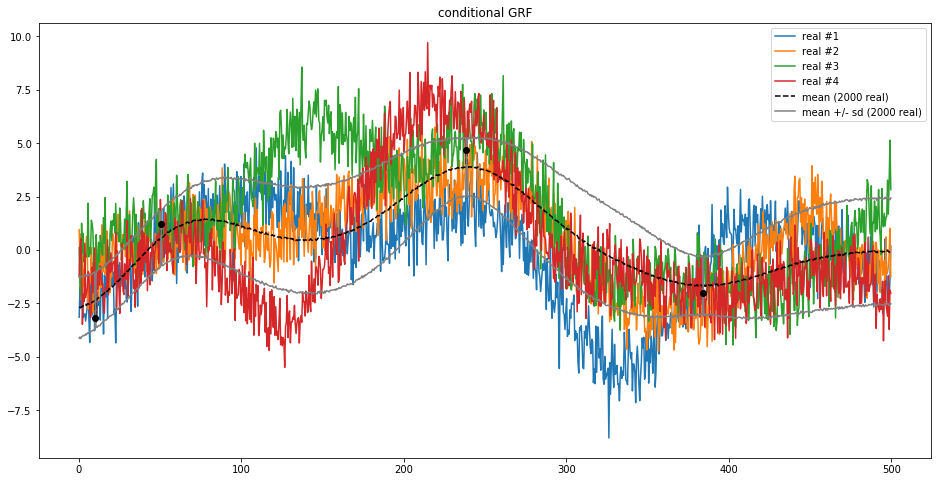

In [14]:
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Db[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Db_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.plot(xg, sim1Db_mean + sim1Db_std, c='gray', label='mean +/- sd ({} real)'.format(nreal))
plt.plot(xg, sim1Db_mean - sim1Db_std, c='gray')
plt.plot(x, v, 'o', c='k') # add conditioning points
plt.legend()
plt.title('conditional GRF')

### Simulations with imposed mean and/or variance
Mean and variance in the simulation grid can be specified, they can be stationary (constant) or non-stationary. 
By default, the mean is zero (constant) and the variance is given by the sill of the variogram model (constant).

#### Simulations with constant mean and variance

In [15]:
np.random.seed(123)
sim1Dc = grf.grf1D(cov_fun, nx, dx, ox, x=x, v=v,
                   mean=3., var=2*w,
                   extensionMin=extensionMin, nreal=nreal)
sim1Dc_mean = np.mean(sim1Dc, axis=0)
sim1Dc_std = np.std(sim1Dc, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 2000...
GRF1D: Unconditional simulation    3-   4 of 2000...
GRF1D: Unconditional simulation    5-   6 of 2000...
GRF1D: Unconditional simulation    7-   8 of 2000...
GRF1D: Unconditional simulation    9-  10 of 2000...
GRF1D: Unconditional simulation   11-  12 of 2000...
GRF1D: Unconditional simulation   13-  14 of 2000...
GRF1D: Unconditional simulation   15-  16 of 2000...
GRF1D: Unconditional simulation   17-  18 of 2000...
GRF1D: Unconditional simulation   19-  20 of 2000...
GRF1D: Unconditional simulation   21-  22 of 2000...
GRF1D: Unconditional simulation   23-  24 of 2000...
GRF1D: 

GRF1D: Unconditional simulation 1387-1388 of 2000...
GRF1D: Unconditional simulation 1389-1390 of 2000...
GRF1D: Unconditional simulation 1391-1392 of 2000...
GRF1D: Unconditional simulation 1393-1394 of 2000...
GRF1D: Unconditional simulation 1395-1396 of 2000...
GRF1D: Unconditional simulation 1397-1398 of 2000...
GRF1D: Unconditional simulation 1399-1400 of 2000...
GRF1D: Unconditional simulation 1401-1402 of 2000...
GRF1D: Unconditional simulation 1403-1404 of 2000...
GRF1D: Unconditional simulation 1405-1406 of 2000...
GRF1D: Unconditional simulation 1407-1408 of 2000...
GRF1D: Unconditional simulation 1409-1410 of 2000...
GRF1D: Unconditional simulation 1411-1412 of 2000...
GRF1D: Unconditional simulation 1413-1414 of 2000...
GRF1D: Unconditional simulation 1415-1416 of 2000...
GRF1D: Unconditional simulation 1417-1418 of 2000...
GRF1D: Unconditional simulation 1419-1420 of 2000...
GRF1D: Unconditional simulation 1421-1422 of 2000...
GRF1D: Unconditional simulation 1423-1424 of 2

GRF1D: Updating conditional simulation  327 of 2000...
GRF1D: Updating conditional simulation  328 of 2000...
GRF1D: Updating conditional simulation  329 of 2000...
GRF1D: Updating conditional simulation  330 of 2000...
GRF1D: Updating conditional simulation  331 of 2000...
GRF1D: Updating conditional simulation  332 of 2000...
GRF1D: Updating conditional simulation  333 of 2000...
GRF1D: Updating conditional simulation  334 of 2000...
GRF1D: Updating conditional simulation  335 of 2000...
GRF1D: Updating conditional simulation  336 of 2000...
GRF1D: Updating conditional simulation  337 of 2000...
GRF1D: Updating conditional simulation  338 of 2000...
GRF1D: Updating conditional simulation  339 of 2000...
GRF1D: Updating conditional simulation  340 of 2000...
GRF1D: Updating conditional simulation  341 of 2000...
GRF1D: Updating conditional simulation  342 of 2000...
GRF1D: Updating conditional simulation  343 of 2000...
GRF1D: Updating conditional simulation  344 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation  957 of 2000...
GRF1D: Updating conditional simulation  958 of 2000...
GRF1D: Updating conditional simulation  959 of 2000...
GRF1D: Updating conditional simulation  960 of 2000...
GRF1D: Updating conditional simulation  961 of 2000...
GRF1D: Updating conditional simulation  962 of 2000...
GRF1D: Updating conditional simulation  963 of 2000...
GRF1D: Updating conditional simulation  964 of 2000...
GRF1D: Updating conditional simulation  965 of 2000...
GRF1D: Updating conditional simulation  966 of 2000...
GRF1D: Updating conditional simulation  967 of 2000...
GRF1D: Updating conditional simulation  968 of 2000...
GRF1D: Updating conditional simulation  969 of 2000...
GRF1D: Updating conditional simulation  970 of 2000...
GRF1D: Updating conditional simulation  971 of 2000...
GRF1D: Updating conditional simulation  972 of 2000...
GRF1D: Updating conditional simulation  973 of 2000...
GRF1D: Updating conditional simulation  974 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation 1570 of 2000...
GRF1D: Updating conditional simulation 1571 of 2000...
GRF1D: Updating conditional simulation 1572 of 2000...
GRF1D: Updating conditional simulation 1573 of 2000...
GRF1D: Updating conditional simulation 1574 of 2000...
GRF1D: Updating conditional simulation 1575 of 2000...
GRF1D: Updating conditional simulation 1576 of 2000...
GRF1D: Updating conditional simulation 1577 of 2000...
GRF1D: Updating conditional simulation 1578 of 2000...
GRF1D: Updating conditional simulation 1579 of 2000...
GRF1D: Updating conditional simulation 1580 of 2000...
GRF1D: Updating conditional simulation 1581 of 2000...
GRF1D: Updating conditional simulation 1582 of 2000...
GRF1D: Updating conditional simulation 1583 of 2000...
GRF1D: Updating conditional simulation 1584 of 2000...
GRF1D: Updating conditional simulation 1585 of 2000...
GRF1D: Updating conditional simulation 1586 of 2000...
GRF1D: Updating conditional simulation 1587 of 2000...
GRF1D: Upd

Text(0.5,1,'conditional GRF - stationary mean and var')

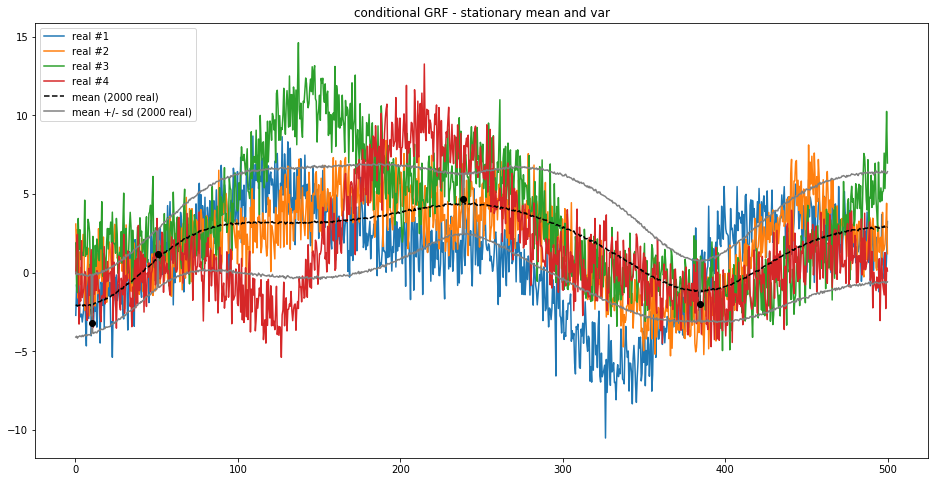

In [16]:
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dc[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Dc_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.plot(xg, sim1Dc_mean + sim1Dc_std, c='gray', label='mean +/- sd ({} real)'.format(nreal))
plt.plot(xg, sim1Dc_mean - sim1Dc_std, c='gray')
plt.plot(x, v, 'o', c='k') # add conditioning points
plt.legend()
plt.title('conditional GRF - stationary mean and var')

### Simulations with non-stationary mean and variance

In [17]:
np.random.seed(123)
mean = np.linspace(-10, 10, nx)
var = np.linspace(0.1, 4, nx)*w
sim1Dd = grf.grf1D(cov_fun, nx, dx, ox, x=x, v=v, 
                   mean=mean, var=var,
                   extensionMin=extensionMin, nreal=nreal)
sim1Dd_mean = np.mean(sim1Dd, axis=0)
sim1Dd_std = np.std(sim1Dd, axis=0)

GRF1D: Preliminary computation...
GRF1D: Computing circulant embedding...
GRF1D: Embedding dimension: 2048
GRF1D: Computing FFT of circulant matrix...
GRF1D: Treatment of conditioning data...
GRF1D: Computing covariance matrix (rAA) for conditioning locations...
GRF1D: Computing index in the embedding grid for non-conditioning / conditioning locations...
GRF1D: Unconditional simulation    1-   2 of 2000...
GRF1D: Unconditional simulation    3-   4 of 2000...
GRF1D: Unconditional simulation    5-   6 of 2000...
GRF1D: Unconditional simulation    7-   8 of 2000...
GRF1D: Unconditional simulation    9-  10 of 2000...
GRF1D: Unconditional simulation   11-  12 of 2000...
GRF1D: Unconditional simulation   13-  14 of 2000...
GRF1D: Unconditional simulation   15-  16 of 2000...
GRF1D: Unconditional simulation   17-  18 of 2000...
GRF1D: Unconditional simulation   19-  20 of 2000...
GRF1D: Unconditional simulation   21-  22 of 2000...
GRF1D: Unconditional simulation   23-  24 of 2000...
GRF1D: 

GRF1D: Unconditional simulation 1459-1460 of 2000...
GRF1D: Unconditional simulation 1461-1462 of 2000...
GRF1D: Unconditional simulation 1463-1464 of 2000...
GRF1D: Unconditional simulation 1465-1466 of 2000...
GRF1D: Unconditional simulation 1467-1468 of 2000...
GRF1D: Unconditional simulation 1469-1470 of 2000...
GRF1D: Unconditional simulation 1471-1472 of 2000...
GRF1D: Unconditional simulation 1473-1474 of 2000...
GRF1D: Unconditional simulation 1475-1476 of 2000...
GRF1D: Unconditional simulation 1477-1478 of 2000...
GRF1D: Unconditional simulation 1479-1480 of 2000...
GRF1D: Unconditional simulation 1481-1482 of 2000...
GRF1D: Unconditional simulation 1483-1484 of 2000...
GRF1D: Unconditional simulation 1485-1486 of 2000...
GRF1D: Unconditional simulation 1487-1488 of 2000...
GRF1D: Unconditional simulation 1489-1490 of 2000...
GRF1D: Unconditional simulation 1491-1492 of 2000...
GRF1D: Unconditional simulation 1493-1494 of 2000...
GRF1D: Unconditional simulation 1495-1496 of 2

GRF1D: Updating conditional simulation  365 of 2000...
GRF1D: Updating conditional simulation  366 of 2000...
GRF1D: Updating conditional simulation  367 of 2000...
GRF1D: Updating conditional simulation  368 of 2000...
GRF1D: Updating conditional simulation  369 of 2000...
GRF1D: Updating conditional simulation  370 of 2000...
GRF1D: Updating conditional simulation  371 of 2000...
GRF1D: Updating conditional simulation  372 of 2000...
GRF1D: Updating conditional simulation  373 of 2000...
GRF1D: Updating conditional simulation  374 of 2000...
GRF1D: Updating conditional simulation  375 of 2000...
GRF1D: Updating conditional simulation  376 of 2000...
GRF1D: Updating conditional simulation  377 of 2000...
GRF1D: Updating conditional simulation  378 of 2000...
GRF1D: Updating conditional simulation  379 of 2000...
GRF1D: Updating conditional simulation  380 of 2000...
GRF1D: Updating conditional simulation  381 of 2000...
GRF1D: Updating conditional simulation  382 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation  962 of 2000...
GRF1D: Updating conditional simulation  963 of 2000...
GRF1D: Updating conditional simulation  964 of 2000...
GRF1D: Updating conditional simulation  965 of 2000...
GRF1D: Updating conditional simulation  966 of 2000...
GRF1D: Updating conditional simulation  967 of 2000...
GRF1D: Updating conditional simulation  968 of 2000...
GRF1D: Updating conditional simulation  969 of 2000...
GRF1D: Updating conditional simulation  970 of 2000...
GRF1D: Updating conditional simulation  971 of 2000...
GRF1D: Updating conditional simulation  972 of 2000...
GRF1D: Updating conditional simulation  973 of 2000...
GRF1D: Updating conditional simulation  974 of 2000...
GRF1D: Updating conditional simulation  975 of 2000...
GRF1D: Updating conditional simulation  976 of 2000...
GRF1D: Updating conditional simulation  977 of 2000...
GRF1D: Updating conditional simulation  978 of 2000...
GRF1D: Updating conditional simulation  979 of 2000...
GRF1D: Upd

GRF1D: Updating conditional simulation 1565 of 2000...
GRF1D: Updating conditional simulation 1566 of 2000...
GRF1D: Updating conditional simulation 1567 of 2000...
GRF1D: Updating conditional simulation 1568 of 2000...
GRF1D: Updating conditional simulation 1569 of 2000...
GRF1D: Updating conditional simulation 1570 of 2000...
GRF1D: Updating conditional simulation 1571 of 2000...
GRF1D: Updating conditional simulation 1572 of 2000...
GRF1D: Updating conditional simulation 1573 of 2000...
GRF1D: Updating conditional simulation 1574 of 2000...
GRF1D: Updating conditional simulation 1575 of 2000...
GRF1D: Updating conditional simulation 1576 of 2000...
GRF1D: Updating conditional simulation 1577 of 2000...
GRF1D: Updating conditional simulation 1578 of 2000...
GRF1D: Updating conditional simulation 1579 of 2000...
GRF1D: Updating conditional simulation 1580 of 2000...
GRF1D: Updating conditional simulation 1581 of 2000...
GRF1D: Updating conditional simulation 1582 of 2000...
GRF1D: Upd

Text(0.5,1,'conditional GRF - non-stationary mean and var')

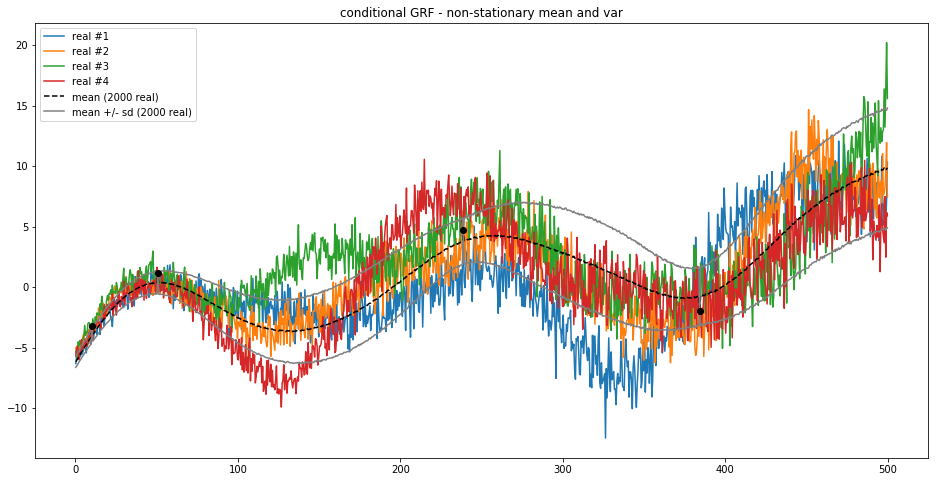

In [18]:
plt.figure(figsize=(16,8))

for i in range(4):
    plt.plot(xg, sim1Dd[i], label='real #{}'.format(i+1))

plt.plot(xg, sim1Dd_mean, c='black', ls='dashed', label='mean ({} real)'.format(nreal))
plt.plot(xg, sim1Dd_mean + sim1Dd_std, c='gray', label='mean +/- sd ({} real)'.format(nreal))
plt.plot(xg, sim1Dd_mean - sim1Dd_std, c='gray')
plt.plot(x, v, 'o', c='k') # add conditioning points
plt.legend()
plt.title('conditional GRF - non-stationary mean and var')